<a href="https://colab.research.google.com/github/RajeshworM/Yield_Modelling_Automation/blob/main/district_scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving forScatter.csv to forScatter (3).csv


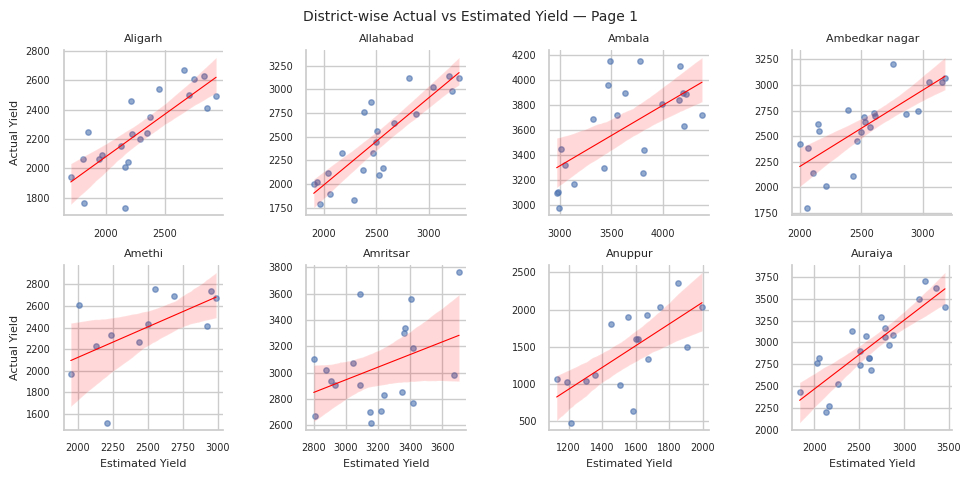

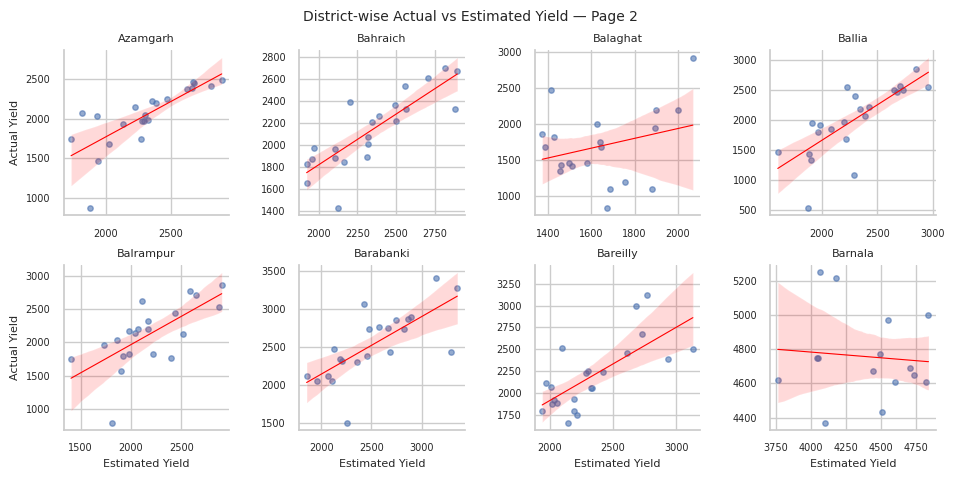

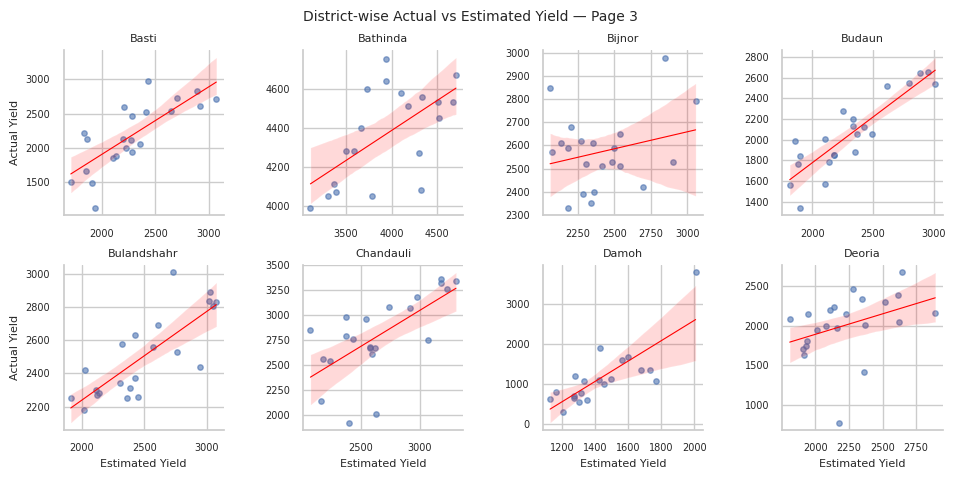

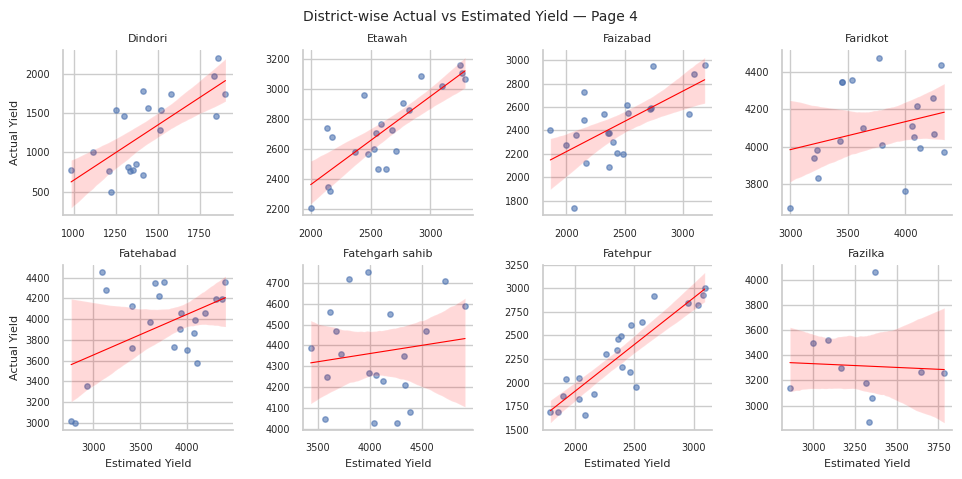

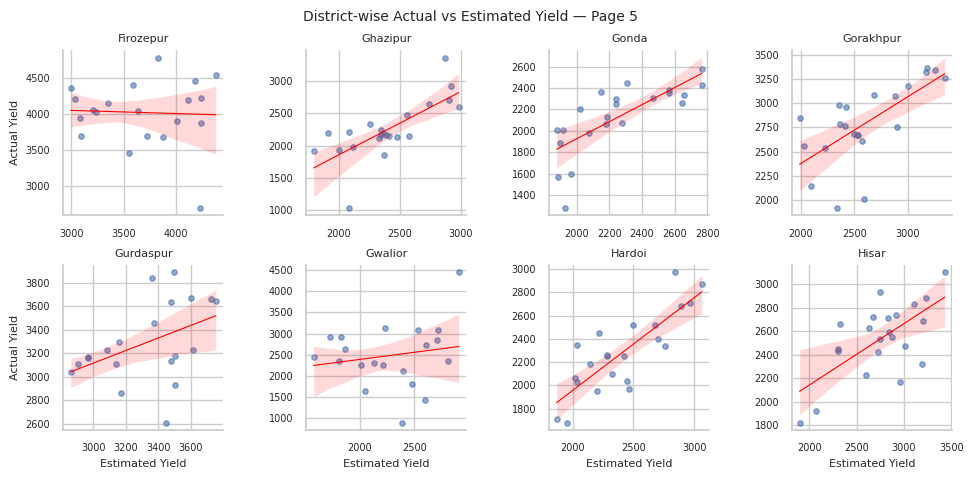

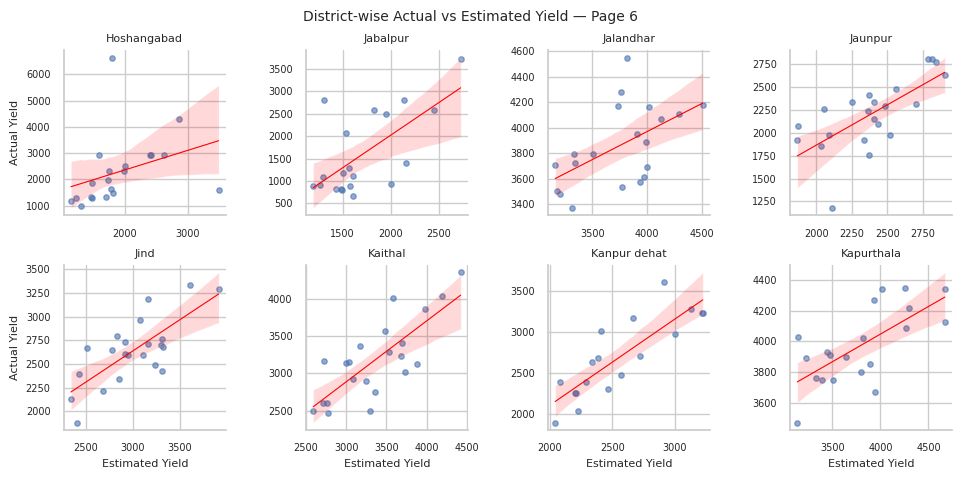

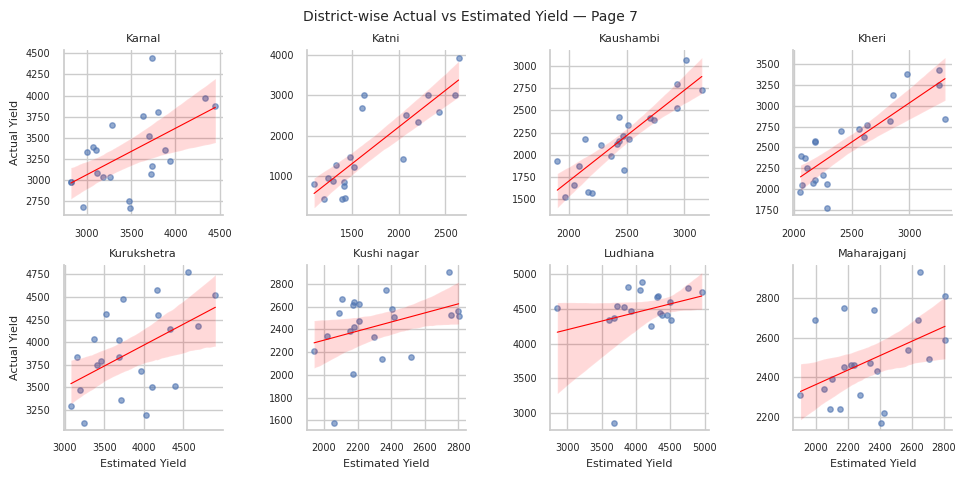

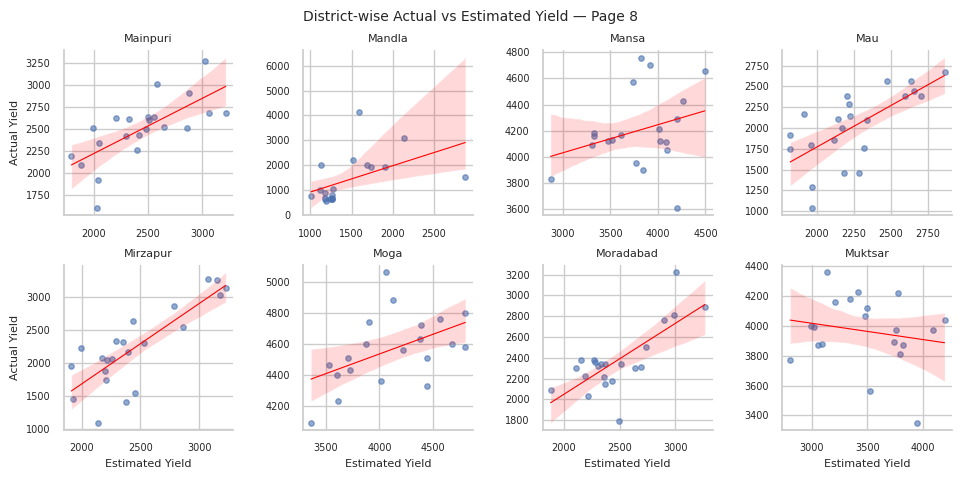

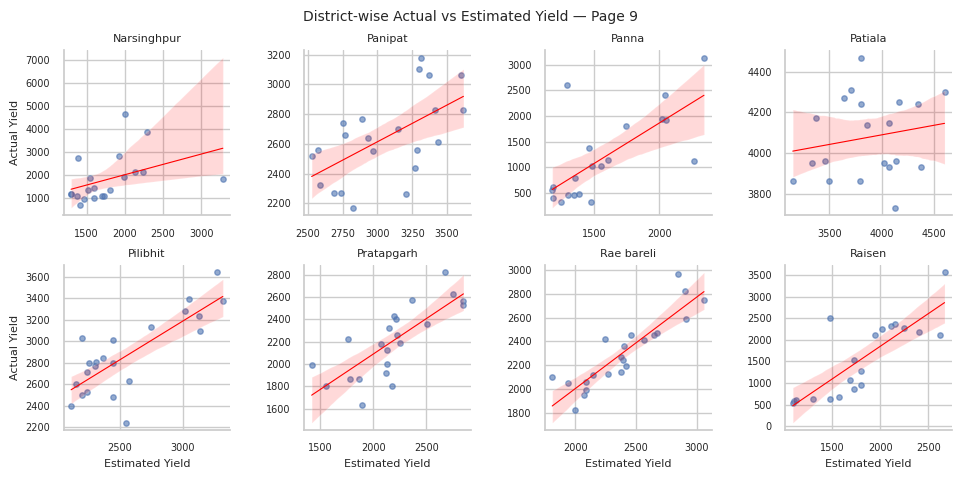

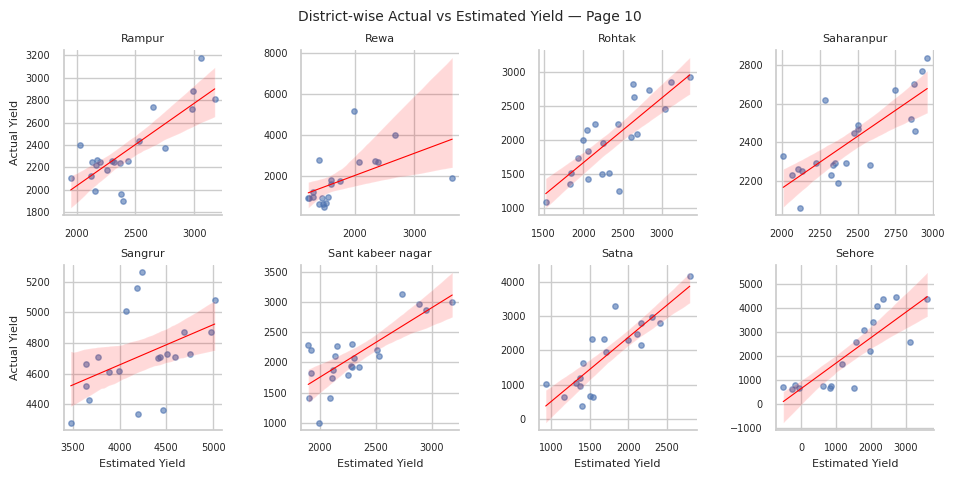

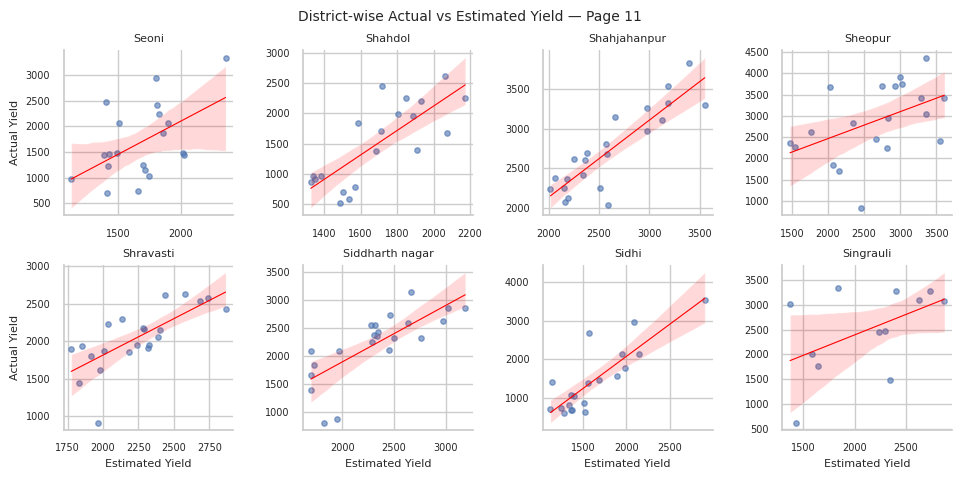

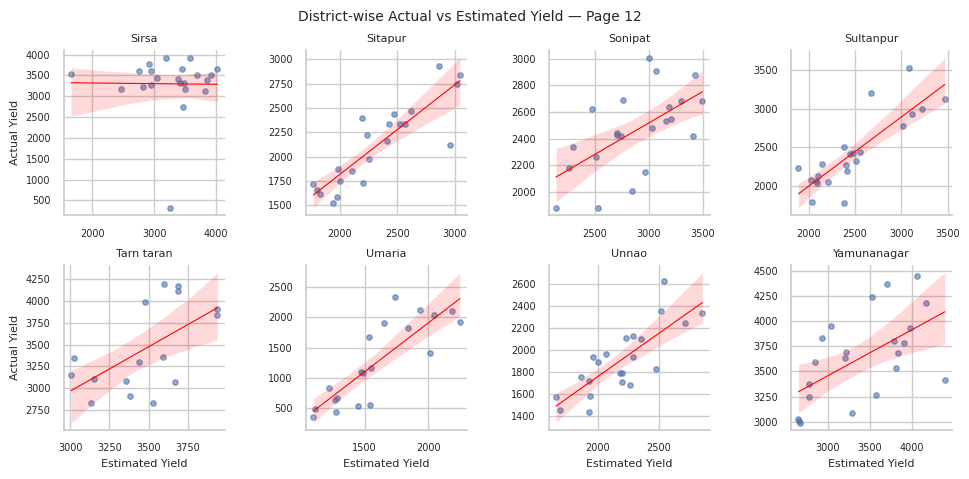

In [4]:
# 1️⃣ Upload your CSV
from google.colab import files
uploaded = files.upload()

# 2️⃣ Read your CSV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv(list(uploaded.keys())[0])

# 3️⃣ Prepare small font theme
sns.set_theme(style="whitegrid", context="notebook")

# Get unique districts
districts_list = df["districts"].unique()

# Function to split list into chunks of size n
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# 4️⃣ Create separate pages with 8 districts each
for i, group in enumerate(chunks(districts_list, 8), start=1):
    subset = df[df["districts"].isin(group)]

    g = sns.FacetGrid(
        subset,
        col="districts",
        col_wrap=4,      # 4 columns → 2 rows → 8 plots
        height=2.5,
        sharex=False,
        sharey=False
    )
    g.map_dataframe(
        sns.regplot,
        x="Estimated",
        y="Actual",
        scatter_kws={"alpha":0.6, "s":15},  # small dots
        line_kws={"color":"red", "lw":0.8}  # thin line
    )

    g.set_titles(col_template="{col_name}", size=8)
    g.set_axis_labels("Estimated Yield", "Actual Yield", fontsize=8)

    for ax in g.axes.flatten():
        ax.tick_params(axis='both', labelsize=7)

    plt.subplots_adjust(top=0.9, hspace=0.3)
    g.fig.suptitle(f"District-wise Actual vs Estimated Yield — Page {i}", fontsize=10)

    plt.show()
